ref
# Tutorial-on-Machine-Learning-for-Industrial-Predictive-Analytics


### Why GPy?
* Specialized library of GP models (regression, classification, GPLVM)
* Variety of covariance functions is implemented
* There are GP models for large-scale problems
* Easy to use

Some state of the art on Gaussian Process Regression:
1. Rasmussen C.E., Williams C.K. Gaussian processes for machine learning. Cambridge: MIT press. 2006.
2. Burnaev E.V., Panov M.E. and Zaytsev, A.A. Regression on the basis of nonstationary Gaussian processes with Bayesian regularization. Journal of communications technology and electronics, 61(6), pp.661-671. 2016.
3. Duvenaud, D.K., Nickisch H. and Rasmussen, C.E. Additive gaussian processes. NIPS. 226-234. 2011.
4. http://gpss.cc/



In [2]:
import matplotlib.pyplot as plt
import GPy
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

## Gaussian Process Regression

A data set $\left (X, \mathbf{y} \right ) = \left \{ (\mathbf{x}_i, y_i), \mathbf{x}_i \in \mathbb{R}^d, y_i \in \mathbb{R} \right \}_{i = 1}^N$ is given.  

Assumption:
$$
y = f(\mathbf{x}) + \varepsilon,
$$
where $f(\mathbf{x})$ is a Gaussian Process and $\varepsilon \sim \mathcal{N}(0, \sigma_0^2)$ is a Gaussian noise .

Posterior distribution
$$
y_* | X, \mathbf{y}, \mathbf{x}_* \sim \mathcal{N}(m(\mathbf{x}_*), \sigma^2(\mathbf{x}_*)),
$$
with predictive mean and variance given by
$$
m(\mathbf{x}_*) = \mathbf{k}^T \mathbf{K}_y^{-1} \mathbf{y} = \sum_{i = 1}^N \alpha_i k(\mathbf{x}_*, \mathbf{x}_i),
$$
$$
\sigma^2(\mathbf{x}_*) = k(\mathbf{x}_*, \mathbf{x}_*) - \mathbf{k}^T\mathbf{K}_y^{-1}\mathbf{k},
$$
where
$$
\mathbf{k} = \left ( k(\mathbf{x}_*, \mathbf{x}_1), \ldots, k(\mathbf{x}_*, \mathbf{x}_n) \right )^T,
$$
$$
\mathbf{K} = \{ k(\mathbf{x}_i, \mathbf{x}_j) \}_{i, j = 1}^n
$$
$$
\mathbf{K}_y = \mathbf{K} + \sigma_0^2 \mathbf{I}.
$$

## GP regression is a way to impose priors over wide range of functions

GP defines distribution over functions, which is defined by its *mean function* $m(\mathbf{x})$ and *covariance function* $k(\mathbf{x}, \mathbf{x}')$ for any set $\mathbf{x}_1, \ldots, \mathbf{x}_n \in \mathbb{R}^d \rightarrow$ $\left (f(\mathbf{x}_1), \ldots, f(\mathbf{x}_n) \right ) \sim \mathcal{N}(\mathbf{m}, \mathbf{K})$,
where $\mathcal{m} = (m(\mathbf{x}_1, \ldots, \mathbf{x}_n))$, $\mathbf{K} = \{ k(\mathbf{x}_i, \mathbf{x}_j) \}_{i,j=1}^n$.

Sampling procedure:

1. Generate set of points $\mathbf{x}_1, \ldots, \mathbf{x}_n$.
2. Calculate mean and covariance matrix $\mathcal{m} = (m(\mathbf{x}_1), \ldots, m(\mathbf{x}_n))$, $\mathbf{K} = \{ k(\mathbf{x}_i, \mathbf{x}_j) \}_{i,j=1}^n$.
3. Generate vector from multivariate normal distribution $\mathcal{N}(\mathbf{m}, \mathbf{K})$.

## Building GPR model

$$
f(x) = − \cos(\pi x) + \sin(4\pi x), \quad x \in [0, 1],
$$
with noise $y(x) = f(x) + \epsilon$, $\epsilon \sim \mathcal{N}(0, 0.1)$. 

In [3]:
n_X = 10
X = np.linspace(0.1, 0.9, n_X).reshape(-1, 1)
Y = (-np.cos(np.pi*X) + np.sin(4*np.pi*X) + np.random.normal(\
                            loc=0.0, scale=0.1, size=(n_X, 1)))

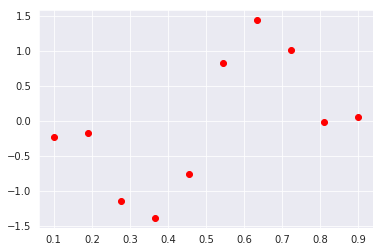

In [4]:
plt.plot(X, Y, 'r.', markersize=12)

#### 1. Define covariance function

The most popular kernel - RBF (or squared exponential) kernel - has 2 parameters: `variance` and `lengthscale`, $k(x, x') = \sigma^2 \exp\left ( -\dfrac{\|x - x'\|^2}{2l^2}\right )$,
where 
* `variance` is $\sigma^2$, 
* `lengthscale` is $l$.


Name : GP regression
Objective : 14.307671777706657
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   0.05  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f5c9561f9e8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f5c956cbba8>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f5c9561fef0>]}

 /home/wonchul/.virtualenvs/p3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


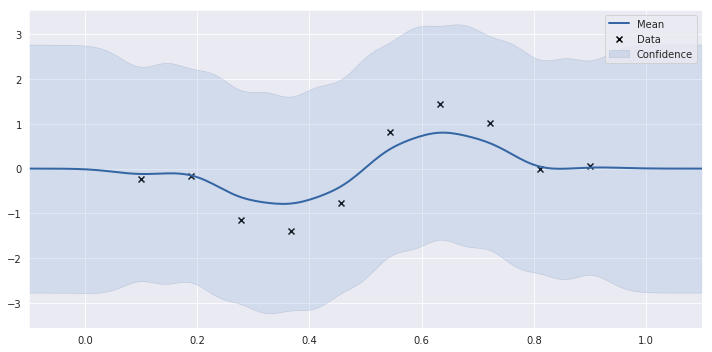

In [5]:
input_dim = 1
variance = 1
lengthscale = 0.05
kernel = GPy.kern.RBF(input_dim=input_dim, variance=variance,\
                         lengthscale=lengthscale)

model = GPy.models.GPRegression(X, Y, kernel)
print(model)
model.plot(figsize=(10, 5))

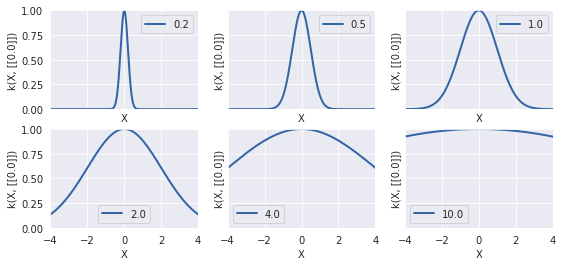

In [6]:
kernel = GPy.kern.RBF(1)
lengthscale_array = np.array([0.2, 0.5, 1, 2, 4, 10])
figure_handle, axes = plt.subplots(2, 3, figsize=(9, 4), 
                                   sharex=True, sharey=True)
for lengthscale, selected_axes in zip(lengthscale_array, axes.ravel()):
    kernel.lengthscale = lengthscale
    kernel.plot(ax=selected_axes)
    selected_axes.set_ylim([0, 1])
    selected_axes.set_xlim([-4, 4])
    selected_axes.legend([lengthscale])

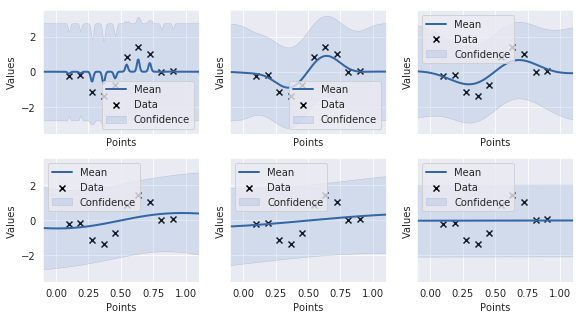

In [8]:
# Let us try to change parameters to obtain more accurate model.
kernel = GPy.kern.RBF(1)
lengthscale_array = np.asarray([0.01, 0.1, 0.2, 0.5, 1, 10])
figure_handle, axes = plt.subplots(2, 3, figsize=(9.5, 5), sharex=True, sharey=True)

for lengthscale, selected_axes in zip(lengthscale_array, axes.ravel()):
    kernel.lengthscale = lengthscale
    model = GPy.models.GPRegression(X, Y, kernel)
    # print(model)
    model.plot(ax=selected_axes)
    selected_axes.set_xlabel('Points')
    selected_axes.set_ylabel('Values')

## Tuning parameters of covariance function

The parameters are tuned by 
1. maximizing likelihood. To do it just use `optimize()` method of the model.
2. LOO CV score.

## Likelihood optimization

Likelihood for Gaussian process regression has the form:
$$
L(k(\mathbf{x}, \mathbf{x}')) = \frac12 [n \sqrt{2 \pi} + \ln |\mathbf{K}_y| + \mathbf{y}^T \mathbf{K}^{-1}_y \mathbf{y}].
$$

{'dataplot': [<matplotlib.collections.PathCollection at 0x7f5c94eef080>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f5c94ee7f98>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f5c94eef550>]}

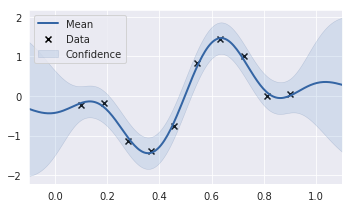

In [15]:
kernel = GPy.kern.RBF(1, lengthscale=0.1)
model = GPy.models.GPRegression(X, Y, kernel)

model.optimize(messages=True)
#print(model)
model.plot(figsize=(5, 3))

### Noise variance

Noise variance $\sigma_0$ acts like a regularization in GP models. Larger values of noise variance lead to more smooth model:

$$
\mathbf{K}_y = \mathbf{K} + \sigma_0^2 \mathbf{I}.
$$

Let's check it: try to change noise variance to some large value, to some small value and see the results.

Noise variance accessed like this: `model.Gaussian_noise.variance = 1`

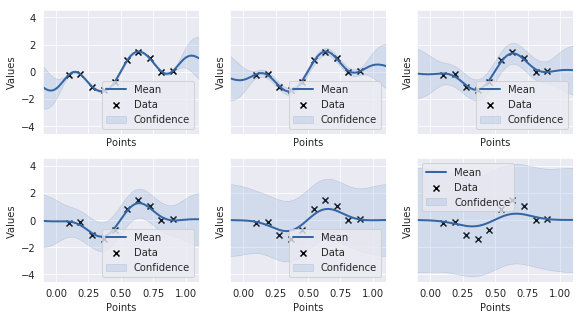

In [16]:
noise_variance_array = [1e-3, 1e-2, 0.1, 0.2, 1, 3]
figure_handle, axes = plt.subplots(2, 3, figsize=(9.5, 5), sharex=True, sharey=True)

for noise_variance, selected_axes in zip(noise_variance_array, axes.ravel()):
    model.Gaussian_noise.variance = noise_variance
  
    model.plot(ax=selected_axes)
    selected_axes.set_xlabel('Points')
    selected_axes.set_ylabel('Values')